In [132]:
import pandas as pd

In [133]:
# samples= pd.read_csv('dataset/Dataset_clean_textblobvader12112023.csv', encoding='ISO-8859-1')
samples= pd.read_csv('dataset/2.Dataset_NomorUrut_clean_content_textblobvader.csv', encoding='UTF-8')
# samples=samples[['likes','replies','quotes','retweets','searchQuery','clean_content']]

In [134]:
samples.head()

,text,clean_content,likes,replies,quotes,retweets,searchQuery,user_location,tanggal,dataset,date,textblob_sentiment,textblob_sentiment_assessment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos,vader_sentiment
0,"Sah, Pasangan Prabowo-Gibran dapat Nomor Urut ...",sah pasang prabowo gibran nomor urut tetap kpu...,0,0,0,0,#nomor,NaN,11/14/2023,prabowogibran,2023-11-14,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
1,#nomor 1 Amin menang,nomor amin menang,0,0,0,0,#nomor,NaN,11/15/2023,prabowogibran,2023-11-15,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
2,Pak Prabowo mengangkat anak penerbang tucano y...,prabowo angkat anak terbang tucano gugur anak ...,0,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
3,"Unboxing Prabowo; Cerita sejarah, deklarasi bu...",unboxing prabowo cerita sejarah deklarasi budi...,1,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
4,#Nomor 1\n\nIndonesia beradab,nomor indonesia adab,0,0,0,0,#nomor,NaN,11/14/2023,prabowogibran,2023-11-14,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral


In [135]:
# samples.isnull().sum()
# samples.isnull().sum().sum()

In [136]:

samples["clean_content"].describe()

count     7306
unique    3307
top       amin
freq        83
Name: clean_content, dtype: object

In [137]:
samples.describe()

,likes,replies,quotes,retweets,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos
count,7306.000000,7306.000000,7306.000000,7306.000000,7306.000000,7306.000000,7306.000000,7306.000000,7306.000000,7306.000000
mean,66.425267,17.613332,2.014645,26.717219,0.006159,0.038919,0.005030,0.009174,0.981375,0.009449
std,570.088226,201.970256,19.295630,227.531628,0.090650,0.162304,0.139722,0.044502,0.063258,0.043785
min,0.000000,0.000000,0.000000,0.000000,-0.875000,0.000000,-0.831600,0.000000,0.185000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,18140.000000,5037.000000,691.000000,4678.000000,1.000000,1.000000,0.980800,0.688000,1.000000,0.815000


In [138]:
len(samples['clean_content'].unique())

3307

In [139]:
print("Jumlah Query unik:",int(len(samples['searchQuery'].unique())))
samples['searchQuery'].unique()

Jumlah Query unik: 28


array(['#nomor', '#KIM', '#gibran', '#prabowo', '#indonesiamaju',
       'paslon', 'nomor urut', '#koalisiindonesiamaju', '#prabowo2024',
       '#prabowogibran', '#aniesmuhaimin', '#aniespresiden',
       '#aniesbaswedan', '#cakimin', '#anies2024', '#muhaimin', '#AMIN',
       '#aniescakimin', '#anies', '#koalisiperubahan', '#ganjarpresiden',
       '#ganjar', '#ganjarpranowo', '#GAMA', '#ganjar2024', '#mahfud',
       '#ganjarmahfud', '#mahfudmd'], dtype=object)

In [140]:
samples['clean_content'].nunique()

3307

## Duplicate Content Check

In [141]:
samples.drop_duplicates(subset=['clean_content'], inplace=True,keep='last')

print(len(samples))

3307


## Remove Paslon #paslon #nomorurut #nomor

In [142]:
# samples = samples.drop(samples[(samples.searchQuery=='nomor urut') | (samples.searchQuery=='#paslon')  | (samples.searchQuery=='paslon')  | (samples.searchQuery=='#nomor')].index)
# print(len(samples))

In [143]:
totaldata=len(samples)
print(totaldata)

3307


## Text Statistics

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'sentiment')

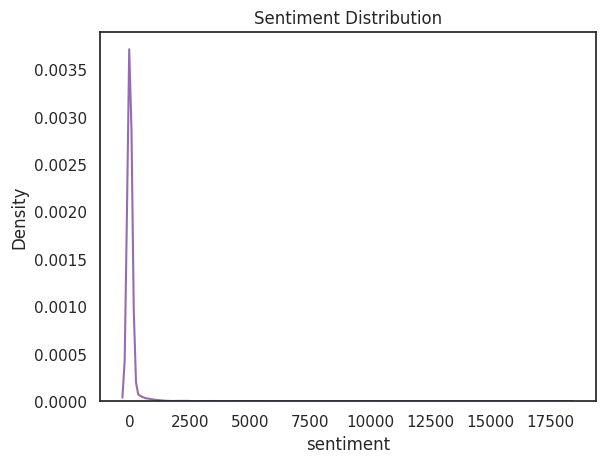

In [145]:
# plt.figure(samples['clean_content'].str.len().hist(alpha=0.3))
sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(samples['likes'],color='m')#,shade=True)
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')

<Axes: >

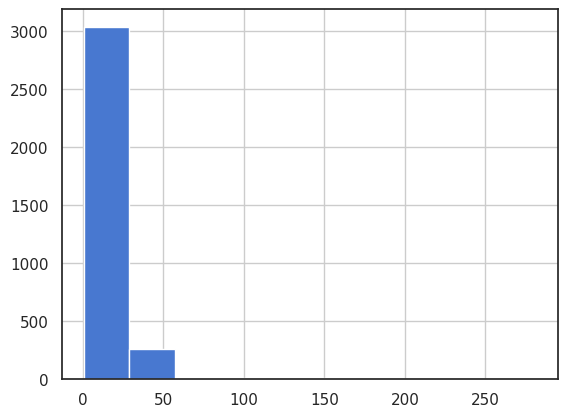

In [146]:
samples['clean_content'].str.split().map(lambda x: len(x)).hist()


## Analyzing Word Lenght

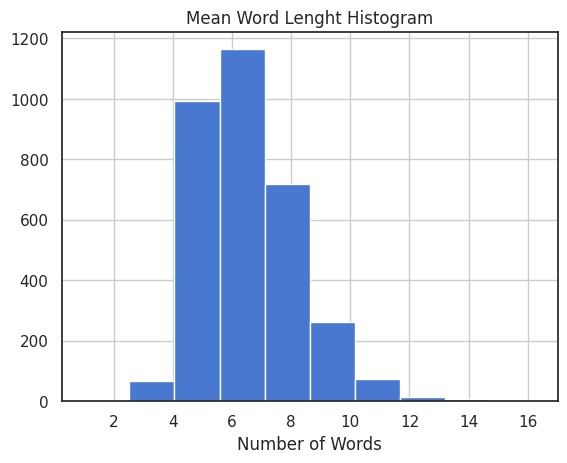

In [147]:
samples['clean_content'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.title('Mean Word Lenght Histogram')
plt.xlabel('Number of Words')
# plt.bar_label(plt.containers[0])
plt.savefig('hasil/4.EDA_Mean_WordLenght_histogram_'+str(totaldata)+'.png')

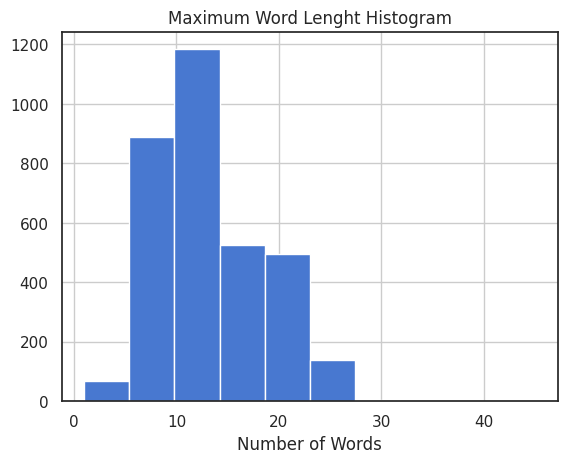

In [148]:
samples['clean_content'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.max(x)).hist()
plt.title('Maximum Word Lenght Histogram')
plt.xlabel('Number of Words')
plt.savefig('hasil/4.EDA_Max_WordLenght_histogram_'+str(totaldata)+'.png')


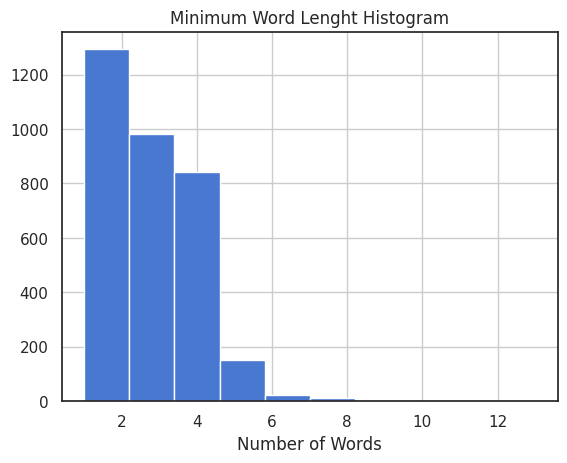

In [149]:
samples['clean_content'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.min(x)).hist()
plt.title('Minimum Word Lenght Histogram')
plt.xlabel('Number of Words')
plt.savefig('hasil/4.EDA_Min_WordLenght_histogram_'+str(totaldata)+'.png')

In [150]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
# from spacy import displacy



In [151]:
# Fetch stopwords
nltk.download('stopwords')
# stop=set(stopwords.words('english')) #for english
stop=set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [152]:
# Create corpus
corpus=[]
new= samples['clean_content'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

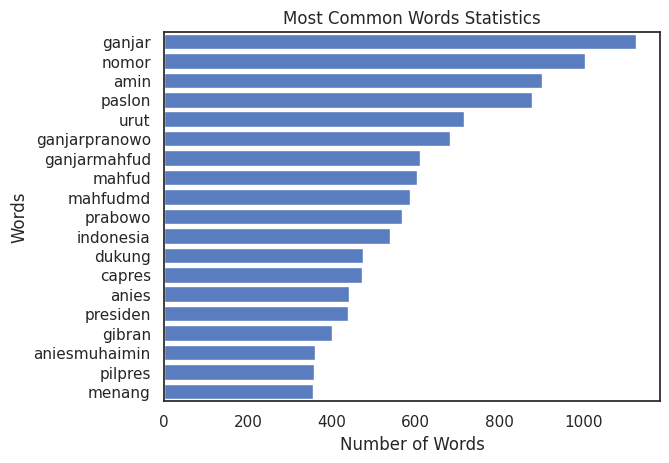

In [153]:
counter=Counter(corpus)
most=counter.most_common()

x, y=[], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.title('Most Common Words Statistics')
plt.xlabel('Number of Words')
plt.ylabel('Words')
plt.savefig('hasil/4.EDA_MostCommonWordsStat_'+str(totaldata)+'.png')

# N-Gram Analysis

In [154]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

## Unigram

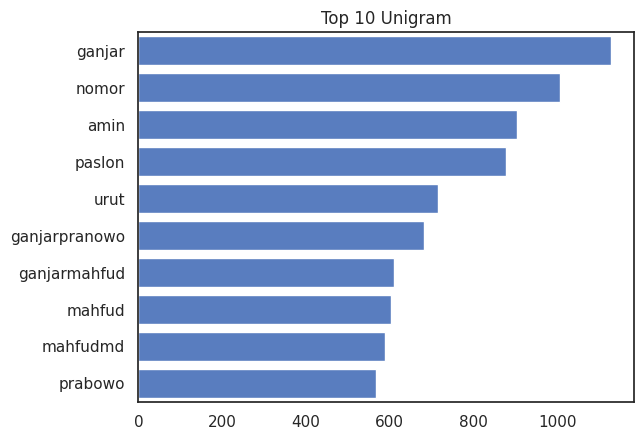

In [155]:
top_n_bigrams=get_top_ngram(samples['clean_content'],1)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.title('Top 10 Unigram')
plt.savefig('hasil/4.EDA_Top10Unigram_'+str(totaldata)+'.png')

## Bigram

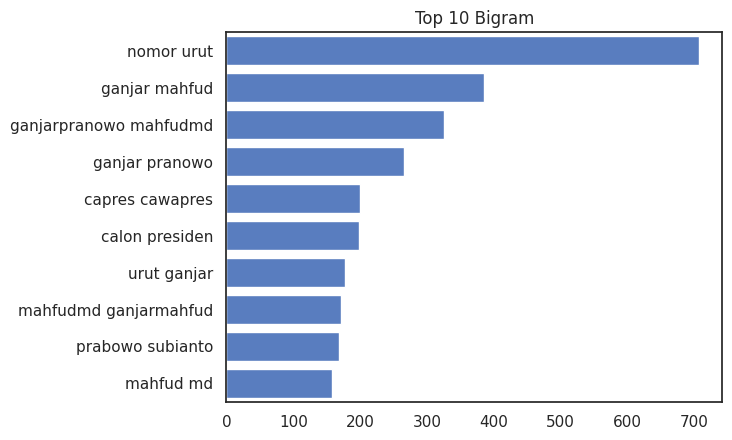

In [156]:
top_n_bigrams=get_top_ngram(samples['clean_content'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.title('Top 10 Bigram')
plt.savefig('hasil/4.EDA_Top10Bigram_'+str(totaldata)+'.png')

## Trigram

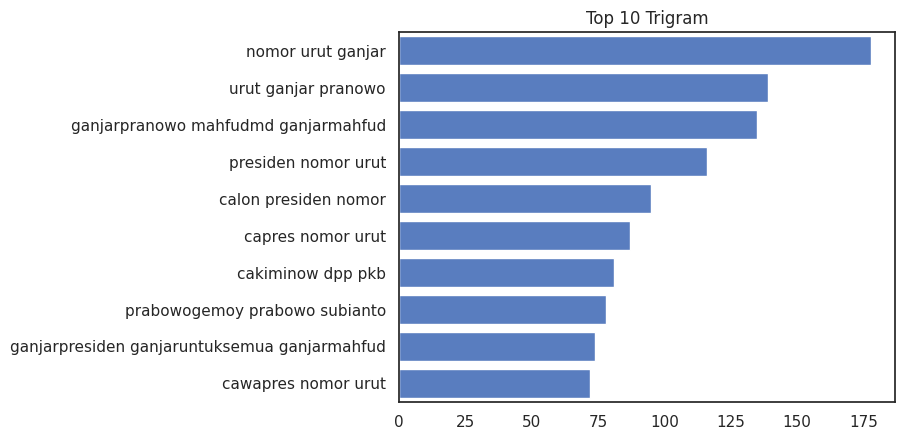

In [157]:
top_n_bigrams=get_top_ngram(samples['clean_content'],3)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.title('Top 10 Trigram')
plt.savefig('hasil/4.EDA_Top10Trigram_'+str(totaldata)+'.png')

In [158]:
samples.columns

Index(['text', 'clean_content', 'likes', 'replies', 'quotes', 'retweets',
       'searchQuery', 'user_location', 'tanggal', 'dataset', 'date',
       'textblob_sentiment', 'textblob_sentiment_assessment',
       'textblob_polarity', 'textblob_subject', 'vader_compound', 'vader_neg',
       'vader_neu', 'vader_pos', 'vader_sentiment'],
      dtype='object')

# Textblob 

In [159]:
def polarity(text):
    tbx=TextBlob(text)#.translate(from_lang='id',to='en')
    # print(tbx)$
    return tbx.sentiment.polarity

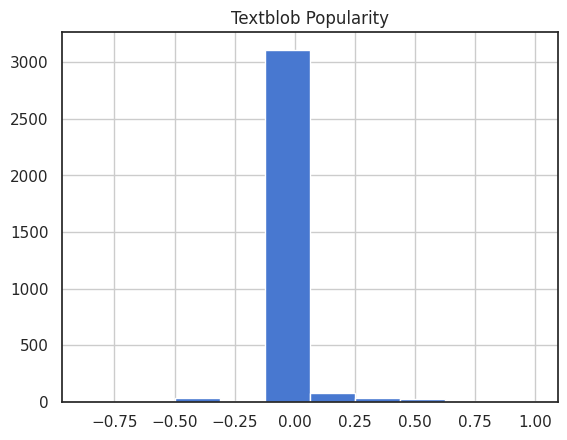

In [160]:
# samples['textblob_polarity']=samples['clean_content'].\
   # apply(lambda x : polarity(x))
samples['textblob_polarity'].hist()
# plt.legend()
plt.title('Textblob Popularity')
plt.savefig('hasil/4.EDA_Texblob_Popularity_'+str(totaldata)+'.png')

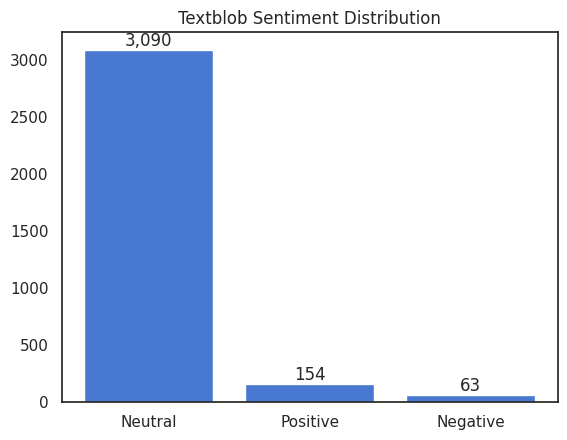

In [161]:
container=plt.bar(samples.textblob_sentiment.value_counts().index,
        samples.textblob_sentiment.value_counts())
plt.title('Textblob Sentiment Distribution')
plt.bar_label(container, fmt='{:,.0f}')
plt.savefig('hasil/4.EDA_Texblob_SentimentDist_'+str(totaldata)+'.png')

# Vader

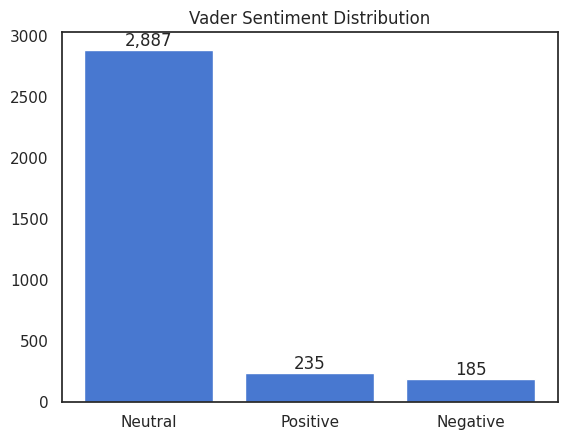

In [162]:
container=plt.bar(samples.vader_sentiment.value_counts().index,
        samples.vader_sentiment.value_counts())
plt.title('Vader Sentiment Distribution')
plt.bar_label(container, fmt='{:,.0f}')
plt.savefig('hasil/4.EDA_Vader_SentimentDist_'+str(totaldata)+'.png')

## 4.5 Feature Extraction

Well, once we have passe through RegEx, stopwords removal and stemming application, to give more meaning for the text we are analysing, we can use approachs like _Bag of Words_, _TF-IDF_ and _Word2Vec_. For make our analysis easier, let's define a function that receives a text and a `vectorizer` object and applies the feature extraction on the respective text.

In [163]:
def extract_features_from_corpus(corpus, vectorizer, df=False):
    """
    Args
    ------------
    text: text to be transformed into a document-term matrix [type: string]
    vectorizer: engine to be used in the transformation [type: object]
    """
    
    # Extracting features
    corpus_features = vectorizer.fit_transform(corpus).toarray()
    features_names = vectorizer.get_feature_names_out()
    
    # Transforming into a dataframe to give interpetability to the process
    df_corpus_features = None
    if df:
        df_corpus_features = pd.DataFrame(corpus_features, columns=features_names)
    
    return corpus_features, df_corpus_features

### 4.5.1 CountVectorizer
On the _Bag of Words_ approach, we create a dicitonary vocabulary with all the unique words and, for each word in each comment/text string, we index the words into a vector that represents the occurence (1) or not (0) of each word. This is a way for transforming a text into a frequency vector considering a literal bag of words (dictionary vocabulary).

In [164]:
# Examples of some portuguese stopwords
ina_stopwords = stopwords.words('indonesian')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(ina_stopwords)}')
ina_stopwords[:10]

Total portuguese stopwords in the nltk.corpous module: 758


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [165]:
# Creating an object for the CountVectorizer class
count_vectorizer = CountVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=ina_stopwords)

# Extracting features for the corpus
countv_features, df_countv_features = extract_features_from_corpus(samples['clean_content'], count_vectorizer, df=True)
print(f'Shape of countv_features matrix: {countv_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_countv_features.head()

Shape of countv_features matrix: (3307, 300)

Example of DataFrame of corpus features:


/home/codespace/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


,acara,adil,aja,alas,allah,ambil,amin,aminajadulu,aminkanindonesia,aminmenang,...,urut,uu,video,viral,visi,wakil,warga,wujud,ya,yuk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
def ngrams_count(corpus, ngram_range, n=-1, cached_stopwords=stopwords.words('indonesian')):
    """
    Args
    ----------
    corpus: text to be analysed [type: pd.DataFrame]
    ngram_range: type of n gram to be used on analysis [type: tuple]
    n: top limit of ngrams to be shown [type: int, default: -1]
    """
    
    # Using CountVectorizer to build a bag of words using the given corpus
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    
    # Returning a DataFrame with the ngrams count
    count_df = pd.DataFrame(total_list, columns=['ngram', 'count'])
    return count_df

In [167]:
# Generating words
# pos_comments = list(df_comments.query('sentiment_label == "positive"')['stopwords_removed'].values)
# positive_words = ' '.join(pos_comments).split(' ')
# neg_comments = list(df_comments.query('sentiment_label == "negative"')['stopwords_removed'].values)
# negative_words = ' '.join(neg_comments).split(' ')

In [168]:
samples.columns

Index(['text', 'clean_content', 'likes', 'replies', 'quotes', 'retweets',
       'searchQuery', 'user_location', 'tanggal', 'dataset', 'date',
       'textblob_sentiment', 'textblob_sentiment_assessment',
       'textblob_polarity', 'textblob_subject', 'vader_compound', 'vader_neg',
       'vader_neu', 'vader_pos', 'vader_sentiment'],
      dtype='object')

In [182]:

# ganjarpos=list(samples.query('(searchQuery=="ganjar") and (vader_sentiment=="Positive")')['vader_sentiment'].values)
# ganjarpos=list(samples.query('(searchQuery=="anies") and (vader_sentiment=="Positive")')['clean_content'])
# ganjarpos=list(samples.query('(vader_sentiment=="Positive") & (dataset=="ganjarmahfud")')['clean_content'])
ganjarneg=list(samples.query('(vader_sentiment=="Negative") & (dataset=="ganjarmahfud")')['clean_content'])
ganjarneu=list(samples.query('(vader_sentiment=="Neutral") & (dataset=="ganjarmahfud")')['clean_content'])
# ganjarneg=list(samples.query('(searchQuery=="anies") and (vader_sentiment=="Negative")')['clean_content'])
# ganjarneg=list(samples.query('(searchQuery=="ganjar") and (vader_sentiment=="Negative")')['vader_sentiment'].values)
# ganjarneu=list(samples.query('(searchQuery=="ganjar") and (vader_sentiment=="Neutral")')['vader_sentiment'].values)
# ganjarpos=list(samples.query('(searchQuery=="ganjar") and (vader_sentiment=="Positive")')[['searchQuery','vader_sentiment','clean_content']].values)

In [183]:
print(len(ganjarneu))

1834


In [184]:
unigrams_pos = ngrams_count(ganjarpos, (1, 1), 10)
unigrams_neg = ngrams_count(ganjarneg, (1, 1), 10)
unigrams_neu = ngrams_count(ganjarneu, (1, 1), 10)

bigrams_pos = ngrams_count(ganjarpos, (2, 2), 10)
bigrams_neg = ngrams_count(ganjarneg, (2, 2), 10)
bigrams_neu = ngrams_count(ganjarneu, (2, 2), 10)

trigrams_pos = ngrams_count(ganjarpos, (3, 3), 10)
trigrams_neg = ngrams_count(ganjarneg, (3, 3), 10)
trigrams_neu = ngrams_count(ganjarneu, (3, 3), 10)

# print(unigrams_pos)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


/tmp/ipykernel_4845/1392205849.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
/tmp/ipykernel_4845/1392205849.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
/tmp/ipykernel_4845/1392205849.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
/tmp/ipykernel_4845/1392205849.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is 

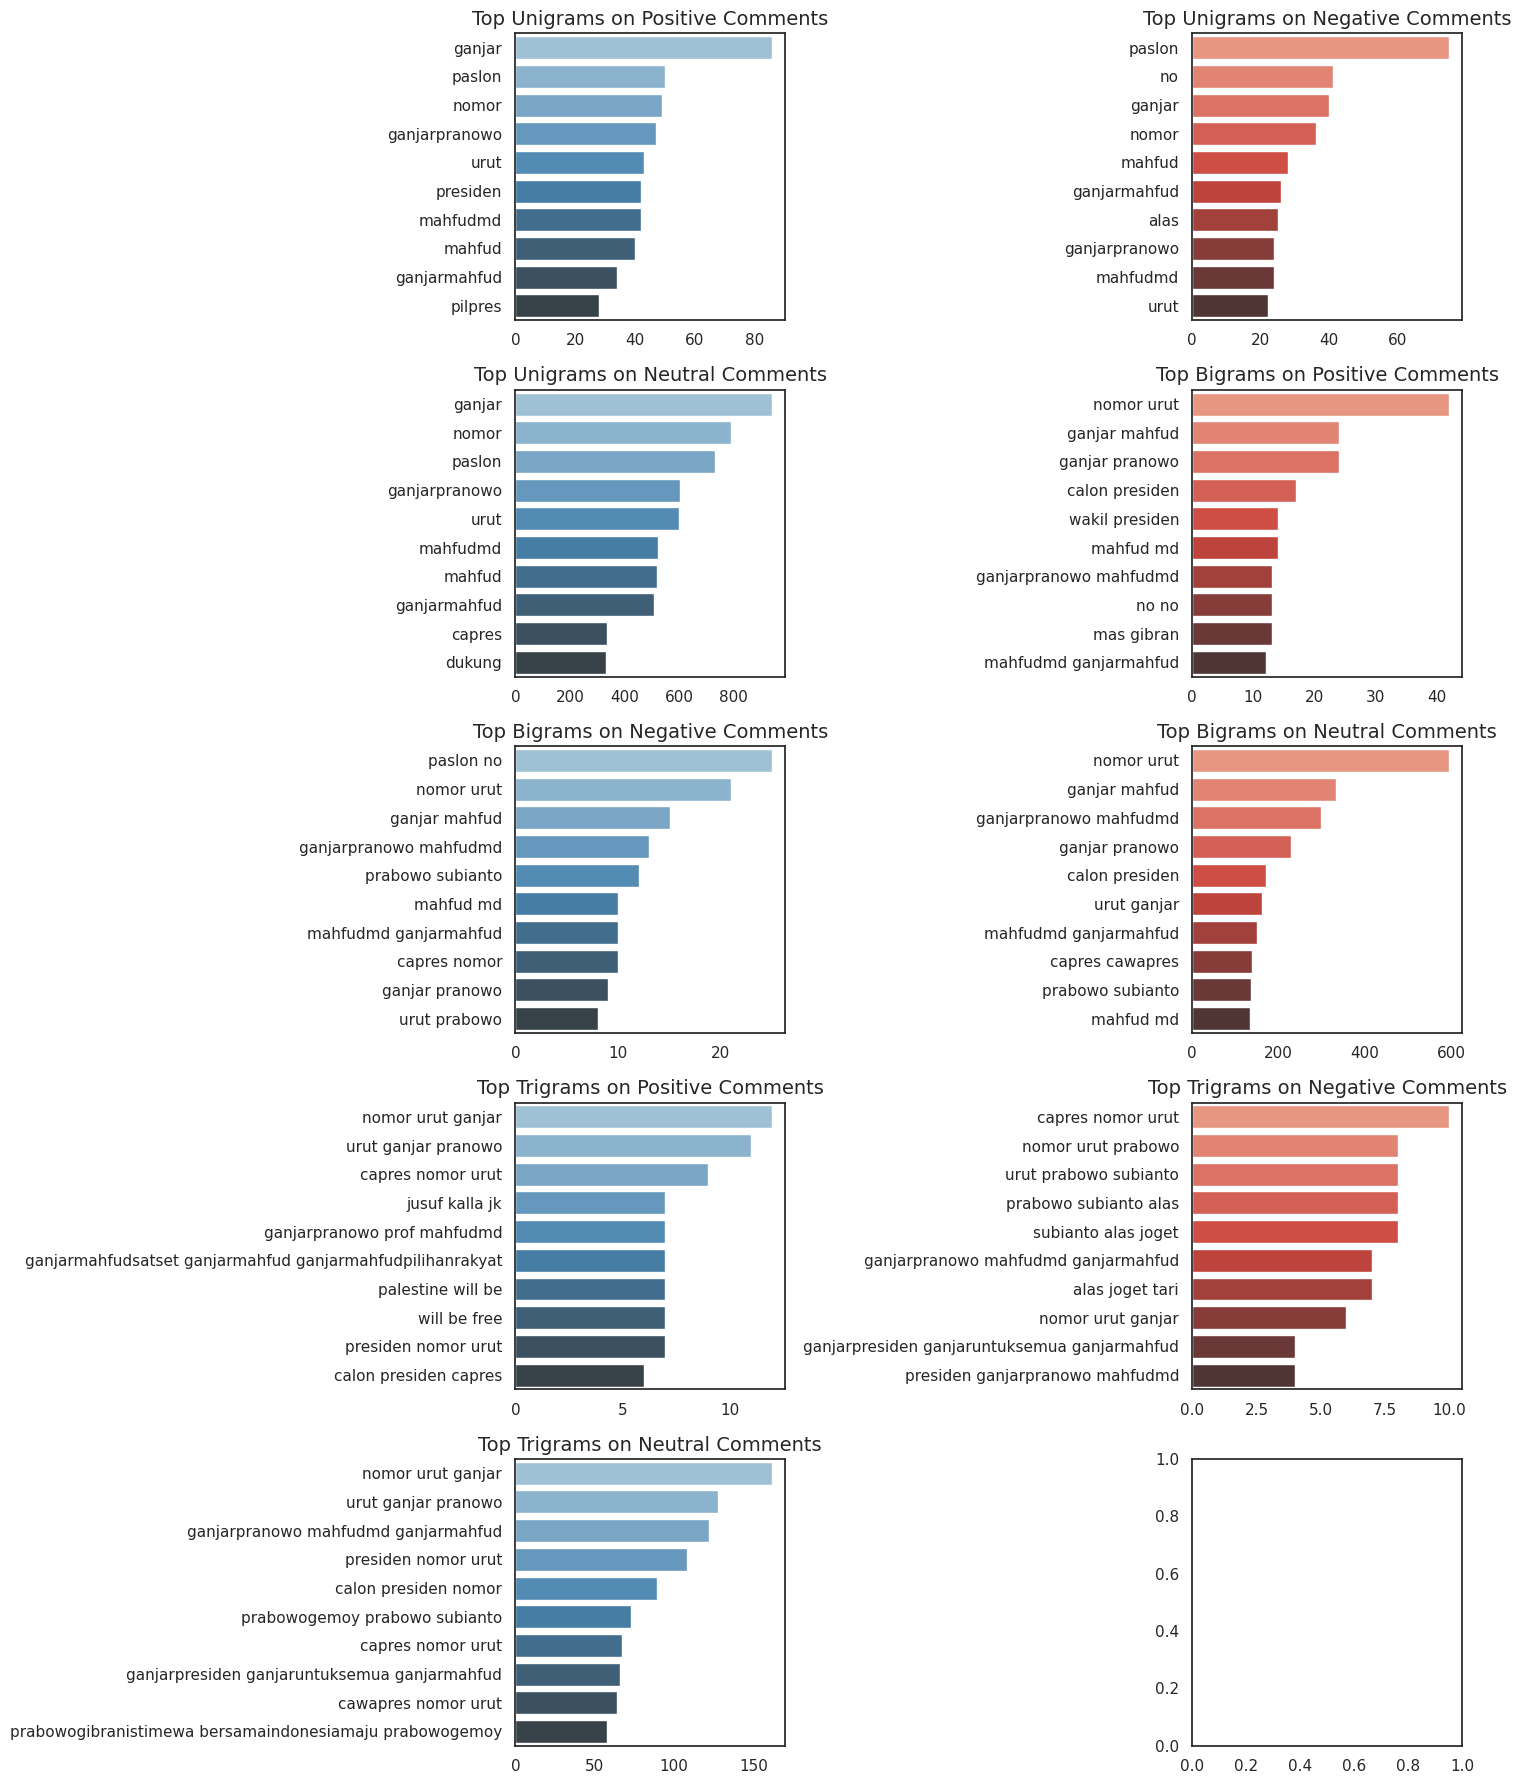

In [185]:
# Joining everything in a python dictionary to make the plots easier
ngram_dict_plot = {
    'Top Unigrams on Positive Comments': unigrams_pos,
    'Top Unigrams on Negative Comments': unigrams_neg,
    'Top Unigrams on Neutral Comments': unigrams_neu,
    'Top Bigrams on Positive Comments': bigrams_pos,
    'Top Bigrams on Negative Comments': bigrams_neg,
    'Top Bigrams on Neutral Comments': bigrams_neu,
    'Top Trigrams on Positive Comments': trigrams_pos,
    'Top Trigrams on Negative Comments': trigrams_neg,
    'Top Trigrams on Neutral Comments': trigrams_neu,
}
# Plotting the ngrams analysis
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
i, j = 0, 0
colors = ['Blues_d', 'Reds_d']
for title, ngram_data in ngram_dict_plot.items():
    ax = axs[i, j]
    sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
    
    # Customizing plots
    # format_spines(ax, right_border=False)
    ax.set_title(title, size=14)
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Incrementing the index
    j += 1
    if j == 2:
        j = 0
        i += 1
plt.tight_layout()
plt.show()